In [4]:
import os
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import dotenv
dotenv.load_dotenv()

True

In [6]:
DATA = Path(os.getenv('DATA'))
DATA

PosixPath('/mnt/qdata/raheppt1/data/tumorvolume')

In [7]:
df = pd.read_csv(DATA/'processed/petct/export/petct_all_predictions.csv')

In [8]:
df

,Unnamed: 0,key,project,dice_background,dice_lesion,volume_manual,volume_prediction,uptake_mean_manual,uptake_std_manual,uptake_median_manual,uptake_min_manual,uptake_max_manual,num_lesions_manual,uptake_mean_prediction,uptake_std_prediction,uptake_median_prediction,uptake_min_prediction,uptake_max_prediction,num_lesions_prediction
0,0,004bc0db32,TUE0001PETBC,0.999860,0.882428,162216.0,157248.0,2.7358923634228436,0.9146715948242867,2.7358923634228436,1.5856934,7.4316406,6,2.7702276022588523,0.9131016765771672,2.7702276022588523,1.373291,7.4316406,6
1,1,00550cd931,TUE0001PETBC,0.999923,0.452989,38628.0,12552.0,2.939431585410842,1.1073084454842943,2.939431585410842,1.6137695,11.162109,7,3.8878962733777485,1.4790249309245103,3.8878962733777485,1.7236328,11.162109,8
2,2,005e396f66,TUE1003MELPE,0.999920,0.744530,100980.0,87144.0,5.542392212566845,2.683744067658097,5.542392212566845,2.027588,26.386719,24,4.904846611642798,2.580982815040137,4.904846611642798,1.9238281,26.386719,14
3,3,018140f8ad,TUE0001PETBC,0.999902,0.846135,94812.0,99228.0,3.3946274106916845,1.8600216996388639,3.3946274106916845,1.7590332,15.166016,8,3.3264385430523644,1.8535203387061183,3.3264385430523644,0.9881592,15.166016,10
4,4,025f1fc28c,TUE0001PETBC,0.999955,0.903299,85656.0,72936.0,6.668036608643878,4.414265375042876,6.668036608643878,1.4587402,18.427734,6,7.458067261023363,4.322863557105312,7.458067261023363,1.7089844,18.427734,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,fe697c7e28,TUE1003MELPE,0.999984,0.815068,13692.0,17844.0,5.341651374890447,2.2085268218355867,5.341651374890447,2.4035645,16.132812,2,5.272559447503363,3.2816343915872457,5.272559447503363,2.0861816,33.398438,8
495,495,ff0b57bf18,TUE1003MELPE,0.999975,0.607919,9396.0,21516.0,5.49319524265645,2.456653313645331,5.49319524265645,2.5195312,13.896484,1,4.637474728109314,2.1996645144747076,4.637474728109314,1.6943359,13.896484,11
496,496,ff0b9c90ef,TUE0001PETBC,0.997264,0.572351,1503084.0,649176.0,4.9499913178504995,3.6005479777197062,4.9499913178504995,1.2976074,34.960938,217,6.853394533993863,4.04498095257033,6.853394533993863,1.1071777,33.867188,96
497,497,ffa5ce5164,TUE0001PETBC,0.999939,0.869907,62004.0,59940.0,4.834814462574995,2.531133260490399,4.834814462574995,1.4538574,11.6015625,6,4.929308996496497,2.518892059671666,4.929308996496497,1.4807129,11.6015625,7


Text(0.5, 1.0, 'dice score histogram')

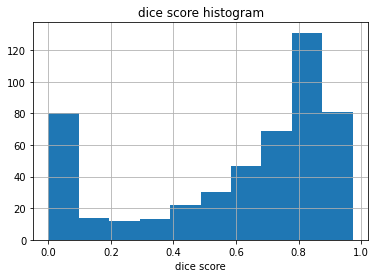

In [4]:
df['dice_lesion'].hist()
plt.xlabel('dice score')
plt.title('dice score histogram')

Text(0, 0.5, 'log tumor volume prediction')

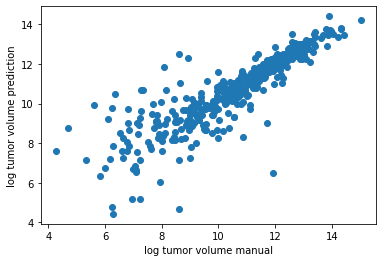

In [5]:
plt.scatter(np.log(df['volume_manual']), np.log(df['volume_prediction']))
plt.xlabel('log tumor volume manual')
plt.ylabel('log tumor volume prediction')

In [6]:
df[['uptake_mean_manual', 'uptake_mean_prediction']]

,uptake_mean_manual,uptake_mean_prediction
0,2.7360443178455163,2.7702281984508548
1,2.939742330737259,3.9682900656217313
2,5.543559494263465,4.904846611642798
3,3.39518830914472,3.326889855751784
4,6.669424287941424,7.458066618336624
...,...,...
494,5.341651374890447,5.383241689888535
495,5.500810259282971,4.628383299457995
496,4.953672073015695,6.879435805422648
497,4.8353461938637246,4.929308214464465


In [33]:
df_organs = pd.read_feather('/mnt/qdata/raheppt1/data/tumorvolume/processed/ctorgans/ctorgans_petct.feather')

In [35]:
df_organs.to_csv('/mnt/qdata/raheppt1/data/tumorvolume/processed/ctorgans/ctorgans_petct.csv')

In [38]:
tmp = pd.read_csv('/mnt/qdata/raheppt1/data/tumorvolume/processed/petct/export/petct_all_predictions.csv')

In [39]:
tmp.to_feather('/mnt/qdata/raheppt1/data/tumorvolume/processed/petct/export/petct_all_predictions.feather')

In [130]:
df_pet = pd.read_csv(DATA/'processed/petct/export/petct_all_predictions.csv').set_index('key')
df_organs = pd.read_feather(DATA/'processed/ctorgans/ctorgans_petct.feather').set_index('key')

In [132]:
df_organs_select = df_organs[df_organs['project']=='TUE0001PETBC']
df_pet_select = df_pet[df_pet['project']=='TUE0001PETBC']

Text(0, 0.5, 'log tumor volume prediction')

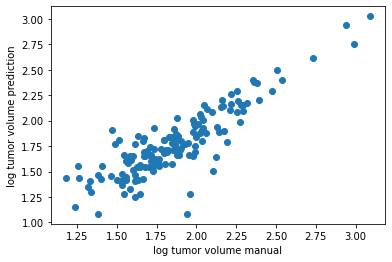

In [133]:
plt.scatter(np.log(df['uptake_median_manual']), np.log(df['uptake_median_prediction']))
plt.xlabel('log tumor volume manual')
plt.ylabel('log tumor volume prediction')

In [136]:
df_pet_select

,Unnamed: 0,project,dice_background,dice_lesion,volume_manual,volume_prediction,uptake_mean_manual,uptake_std_manual,uptake_median_manual,uptake_min_manual,uptake_max_manual,num_lesions_manual,uptake_mean_prediction,uptake_std_prediction,uptake_median_prediction,uptake_min_prediction,uptake_max_prediction,num_lesions_prediction
key,,,,,,,,,,,,,,,,,,
004bc0db32,0,TUE0001PETBC,0.999860,0.882428,162216.0,157248.0,2.7358923634228436,0.9146715948242867,2.7358923634228436,1.5856934,7.4316406,6,2.7702276022588523,0.9131016765771672,2.7702276022588523,1.373291,7.4316406,6
00550cd931,1,TUE0001PETBC,0.999923,0.452989,38628.0,12552.0,2.939431585410842,1.1073084454842943,2.939431585410842,1.6137695,11.162109,7,3.8878962733777485,1.4790249309245103,3.8878962733777485,1.7236328,11.162109,8
018140f8ad,3,TUE0001PETBC,0.999902,0.846135,94812.0,99228.0,3.3946274106916845,1.8600216996388639,3.3946274106916845,1.7590332,15.166016,8,3.3264385430523644,1.8535203387061183,3.3264385430523644,0.9881592,15.166016,10
025f1fc28c,4,TUE0001PETBC,0.999955,0.903299,85656.0,72936.0,6.668036608643878,4.414265375042876,6.668036608643878,1.4587402,18.427734,6,7.458067261023363,4.322863557105312,7.458067261023363,1.7089844,18.427734,9
04cada68ac,8,TUE0001PETBC,0.999588,0.873581,494844.0,390972.0,4.798456559036787,2.4568592690227455,4.798456559036787,1.3647461,17.666016,11,5.400380014425585,2.4281202789516954,5.400380014425585,1.8200684,17.666016,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fc160a1ec8,489,TUE0001PETBC,0.999623,0.639892,198684.0,95028.0,3.9441838233073625,1.8861375708037433,3.9441838233073625,1.5454102,13.076172,14,5.08086169339563,1.8390985183656234,5.08086169339563,2.150879,13.076172,7
fd6fd99030,492,TUE0001PETBC,0.999604,0.803496,243684.0,199848.0,3.8820630663071847,1.8657919473655429,3.8820630663071847,1.2792969,15.498047,27,4.242731194457788,1.9083240749865635,4.242731194457788,1.4550781,15.498047,41
ff0b9c90ef,496,TUE0001PETBC,0.997264,0.572351,1503084.0,649176.0,4.9499913178504995,3.6005479777197062,4.9499913178504995,1.2976074,34.960938,217,6.853394533993863,4.04498095257033,6.853394533993863,1.1071777,33.867188,96


In [ ]:
df_pet_select

In [138]:
result = pd.merge(df_organs_select, df_pet_select, how='inner', on=['key'])
result

,index,project_x,volume_liver,volume_spine,volume_spleen,uptake_liver_mean,uptake_liver_std,uptake_liver_min,uptake_liver_max,uptake_liver_median,...,uptake_median_manual,uptake_min_manual,uptake_max_manual,num_lesions_manual,uptake_mean_prediction,uptake_std_prediction,uptake_median_prediction,uptake_min_prediction,uptake_max_prediction,num_lesions_prediction
key,,,,,,,,,,,,,,,,,,,,,
004bc0db32,0,TUE0001PETBC,1570188.0,516240.0,158076.0,1.909815,0.561522,0.132904,8.120117,1.979980,...,2.7358923634228436,1.5856934,7.4316406,6,2.7702276022588523,0.9131016765771672,2.7702276022588523,1.373291,7.4316406,6
00550cd931,0,TUE0001PETBC,1427520.0,488832.0,277500.0,2.780400,0.663773,0.404053,5.996094,2.766113,...,2.939431585410842,1.6137695,11.162109,7,3.8878962733777485,1.4790249309245103,3.8878962733777485,1.7236328,11.162109,8
018140f8ad,0,TUE0001PETBC,1785360.0,720816.0,248952.0,1.932202,0.314870,0.415344,5.800781,1.936035,...,3.3946274106916845,1.7590332,15.166016,8,3.3264385430523644,1.8535203387061183,3.3264385430523644,0.9881592,15.166016,10
025f1fc28c,0,TUE0001PETBC,1614516.0,777624.0,172188.0,1.992658,0.436342,0.250092,4.182129,1.993408,...,6.668036608643878,1.4587402,18.427734,6,7.458067261023363,4.322863557105312,7.458067261023363,1.7089844,18.427734,9
04cada68ac,0,TUE0001PETBC,1834140.0,588756.0,219084.0,2.404207,0.777529,0.194855,5.498047,2.519531,...,4.798456559036787,1.3647461,17.666016,11,5.400380014425585,2.4281202789516954,5.400380014425585,1.8200684,17.666016,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fc160a1ec8,0,TUE0001PETBC,1782840.0,566244.0,164352.0,2.681572,0.484435,0.542908,4.868164,2.687988,...,3.9441838233073625,1.5454102,13.076172,14,5.08086169339563,1.8390985183656234,5.08086169339563,2.150879,13.076172,7
fd6fd99030,0,TUE0001PETBC,1658304.0,438696.0,66468.0,2.090931,0.345864,0.466003,3.725586,2.091064,...,3.8820630663071847,1.2792969,15.498047,27,4.242731194457788,1.9083240749865635,4.242731194457788,1.4550781,15.498047,41
ff0b9c90ef,0,TUE0001PETBC,2792376.0,516648.0,323688.0,2.962917,2.523895,0.239258,34.960938,2.390137,...,4.9499913178504995,1.2976074,34.960938,217,6.853394533993863,4.04498095257033,6.853394533993863,1.1071777,33.867188,96


In [139]:
df_age = pd.read_csv(DATA/'raw/ano_TSHOD_TSMEL_PETBC_metadata.csv').set_index('key')
#df_age = df_age[df_age['project']=='TU1015TSMEL']
df_age

,Unnamed: 0,project,age
key,,,
8a3c66869b,0,TUE1015TSMEL,75
d23e47743a,1,TUE1015TSMEL,79
ba7a84bd0b,2,TUE1015TSMEL,74
293fbb4434,3,TUE1015TSMEL,44
4f603e45c3,4,TUE1015TSMEL,67
...,...,...,...
7f6ca982c1,220,TUE0001PETBC,59
509d62863a,221,TUE0001PETBC,79
b9ffd2f166,222,TUE0001PETBC,64


In [140]:
all_ano = pd.merge(result, df_age, how='inner', on=['key'])

In [142]:
all_ano = all_ano.drop([ 'project_x', 'project_y', 'Unnamed: 0_y', 'Unnamed: 0_x'], axis=1)
all_ano

,index,volume_liver,volume_spine,volume_spleen,uptake_liver_mean,uptake_liver_std,uptake_liver_min,uptake_liver_max,uptake_liver_median,uptake_spine_mean,...,uptake_max_manual,num_lesions_manual,uptake_mean_prediction,uptake_std_prediction,uptake_median_prediction,uptake_min_prediction,uptake_max_prediction,num_lesions_prediction,project,age
key,,,,,,,,,,,,,,,,,,,,,
004bc0db32,0,1570188.0,516240.0,158076.0,1.909815,0.561522,0.132904,8.120117,1.979980,1.110203,...,7.4316406,6,2.7702276022588523,0.9131016765771672,2.7702276022588523,1.373291,7.4316406,6,TUE0001PETBC,66
00550cd931,0,1427520.0,488832.0,277500.0,2.780400,0.663773,0.404053,5.996094,2.766113,1.503741,...,11.162109,7,3.8878962733777485,1.4790249309245103,3.8878962733777485,1.7236328,11.162109,8,TUE0001PETBC,70
018140f8ad,0,1785360.0,720816.0,248952.0,1.932202,0.314870,0.415344,5.800781,1.936035,1.345005,...,15.166016,8,3.3264385430523644,1.8535203387061183,3.3264385430523644,0.9881592,15.166016,10,TUE0001PETBC,44
025f1fc28c,0,1614516.0,777624.0,172188.0,1.992658,0.436342,0.250092,4.182129,1.993408,1.077088,...,18.427734,6,7.458067261023363,4.322863557105312,7.458067261023363,1.7089844,18.427734,9,TUE0001PETBC,77
04cada68ac,0,1834140.0,588756.0,219084.0,2.404207,0.777529,0.194855,5.498047,2.519531,1.920722,...,17.666016,11,5.400380014425585,2.4281202789516954,5.400380014425585,1.8200684,17.666016,9,TUE0001PETBC,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fc160a1ec8,0,1782840.0,566244.0,164352.0,2.681572,0.484435,0.542908,4.868164,2.687988,1.489628,...,13.076172,14,5.08086169339563,1.8390985183656234,5.08086169339563,2.150879,13.076172,7,TUE0001PETBC,83
fd6fd99030,0,1658304.0,438696.0,66468.0,2.090931,0.345864,0.466003,3.725586,2.091064,1.713623,...,15.498047,27,4.242731194457788,1.9083240749865635,4.242731194457788,1.4550781,15.498047,41,TUE0001PETBC,68
ff0b9c90ef,0,2792376.0,516648.0,323688.0,2.962917,2.523895,0.239258,34.960938,2.390137,2.099665,...,34.960938,217,6.853394533993863,4.04498095257033,6.853394533993863,1.1071777,33.867188,96,TUE0001PETBC,57


In [143]:
all_ano.to_csv(DATA/'processed/petct/export/TUE0001PETBC_compiled.csv')